In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

from matplotlib.ticker import AutoMinorLocator, FormatStrFormatter
import os
from os import path 
import h5py
import sys
import Initialize_Paths as Paths

# Import Reading Functions
sys.path.insert(0, Paths.Surqct_path  + '/surqct/scripts/Paper_figures/')
from Reading import read_diatdata, read_HDF5, read_pops

In [2]:
pd.set_option('display.max_columns', None)  
sns.set_style('ticks')
plt.rc('text', usetex=True)
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath} \boldmath']
# plt.rc('text.latex', preamble=r'\usepackage{pifont} \usepackage{tikz} \usepackage[utf8]{inputenc}')
plt.rc('font', family='Times')
sns.set_context("paper")

# Tick parameters
plt.rcParams['xtick.labelsize'] = 40
plt.rcParams['ytick.labelsize'] = 40
mpl.rcParams['xtick.major.size'] = 20
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.size'] = 10
mpl.rcParams['xtick.minor.width'] = 2
mpl.rcParams['ytick.major.size'] = 20
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.size'] = 10
mpl.rcParams['ytick.minor.width'] = 2

plt.rcParams['axes.labelsize'] = 40
plt.rcParams['axes.titlesize'] = 40
plt.rcParams['legend.fontsize'] = 35

<ipython-input-2-cf7c5584ff04>:4: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath} \boldmath']


In [9]:
SystName    = 'N3_NASA'
ReactionFlgQCT    = '0_1_1_0'
ReactionFlgSurQCT = '0_1_1_0'
Temp = 5000
PopPlotTime = [1e-6]

In [10]:
import Initialize_System
Initialize = getattr(Initialize_System,'Initialize_'+SystName)
System = Initialize()

In [11]:
QCT_ME_path    = Paths.Workspace_path + 'Air_Database/Run_0D_diffAccuracy/' 
Figure_ME_path = Paths.Workspace_path + '/SurQCT/0D/Figures/' + System.Name + '/RateSensitivity/'

print('QCT Master Equation Path    :', QCT_ME_path)

QCT Master Equation Path    : /home/venturi/WORKSPACE/Air_Database/Run_0D_diffAccuracy/


In [12]:
# accuracies = ['1em13','1em14','1em15','1em16']
accuracies = ['1em0','1em16','1em15']

# Read Diatomic Potentials
DiatData   = []

for iMol in range(System.NMolecules):
    DiatDataTemp = read_diatdata(System.PathToDiatFile[iMol], System.Molecule[iMol].Name, np.array([Temp]))
    DiatData.append(DiatDataTemp)
    System.Molecule[iMol].NLevels = np.size(DiatData[iMol]['EInt'].to_numpy())

[HCN]:   Reading Molecular Levels Data from: /home/venturi/WORKSPACE/CoarseAIR/coarseair/dtb/Molecules/N2/LeRoy/MyLeroy_FromRobyn.inp


In [13]:
range(len(accuracies))

range(0, 3)

In [14]:
QCT=[]
PopQCT = []

for iTemp in range(len(accuracies)):
    
    # QCT
    FileName=QCT_ME_path+'output_'+System.Name+'_T'+str(Temp)+'K_'+ReactionFlgQCT+'_'+accuracies[iTemp]+'/box.dat'
    QCTTemp=pd.read_csv(FileName,delimiter='  ')
    QCTTemp.columns = System.Box_Header
    QCT.append(QCTTemp)
    QCT[iTemp].NSteps = np.size(QCT[iTemp]['time'].to_numpy()) 

    PopFilePath=QCT_ME_path+'output_'+System.Name+'_T'+str(Temp)+'K_'+ReactionFlgQCT+'_'+accuracies[iTemp]
    PopTempQCT=read_pops(PopFilePath,System,DiatData,QCT[iTemp].time)
    PopQCT.append(PopTempQCT)
    

<ipython-input-14-2c6546073343>:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  QCTTemp=pd.read_csv(FileName,delimiter='  ')


[Master Equation]:   Reading Population Data from: /home/venturi/WORKSPACE/Air_Database/Run_0D_diffAccuracy/output_N3_NASA_T5000K_0_1_1_0_1em0
[Master Equation]:   Reading Population Data from: /home/venturi/WORKSPACE/Air_Database/Run_0D_diffAccuracy/output_N3_NASA_T5000K_0_1_1_0_1em16
[Master Equation]:   Reading Population Data from: /home/venturi/WORKSPACE/Air_Database/Run_0D_diffAccuracy/output_N3_NASA_T5000K_0_1_1_0_1em15


In [15]:
from Compute import compute_energy

for iTemp in range(len(accuracies)):
    QCT[iTemp].eRot, QCT[iTemp].eVib = compute_energy(System, PopQCT[iTemp].Pop, DiatData, QCT[iTemp])


<ipython-input-15-876098fbe77d>:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  QCT[iTemp].eRot, QCT[iTemp].eVib = compute_energy(System, PopQCT[iTemp].Pop, DiatData, QCT[iTemp])


In [16]:
# Energy evolution plot                                                                                                                        
def Plot_Energies(System,QCT,EnergyXLim):                                                                                       
                                                                                                                                               
    iTemp = 0                                                                                                                                  
    fig,ax = plt.subplots(1,2,figsize=(20,10))                                                                                                 
                                                      
#     ax[0].plot(QCT[iTemp].time, QCT[iTemp].eRot,'--k', label='\\textbf{ERot}',linewidth=3)                                                       
#     ax[1].plot(QCT[iTemp].time, QCT[iTemp].eVib, '-k', label='\\textbf{EVib}',linewidth=3) 
    
    for iTemp in range(len(accuracies)):                                                                                                                                                                                                                        
                                                                                                                                               
        ax[0].plot(QCT[iTemp].time, QCT[iTemp].eRot,'--', label=accuracies[iTemp], linewidth=3) 
        ax[1].plot(QCT[iTemp].time, QCT[iTemp].eVib, '-', label=accuracies[iTemp], linewidth=3)                                                                                                                     
                                                                                                                                               
        plt.legend(frameon=False)                                                                                                              
        ax[0].set_xscale('log')   
        ax[1].set_xscale('log')                                                                                                           
        ax[0].set_xlim(EnergyXLim)
        ax[1].set_xlim(EnergyXLim)
        ax[0].set_xlabel('\\textbf{t [s]}')                                                                                                          
        ax[0].set_ylabel('\\textbf{ERot [eV]}') 
        ax[1].set_xlabel('\\textbf{t [s]}')                                                                                                          
        ax[1].set_ylabel('\\textbf{EVib [eV]}') 
        
        ax[0].set_aspect(1.0/ax[0].get_data_ratio(), adjustable='box')   
        ax[1].set_aspect(1.0/ax[1].get_data_ratio(), adjustable='box')                                                                               
        fig.tight_layout(pad=0.75)                                                                                                             
                                                                                                                                        
    return fig

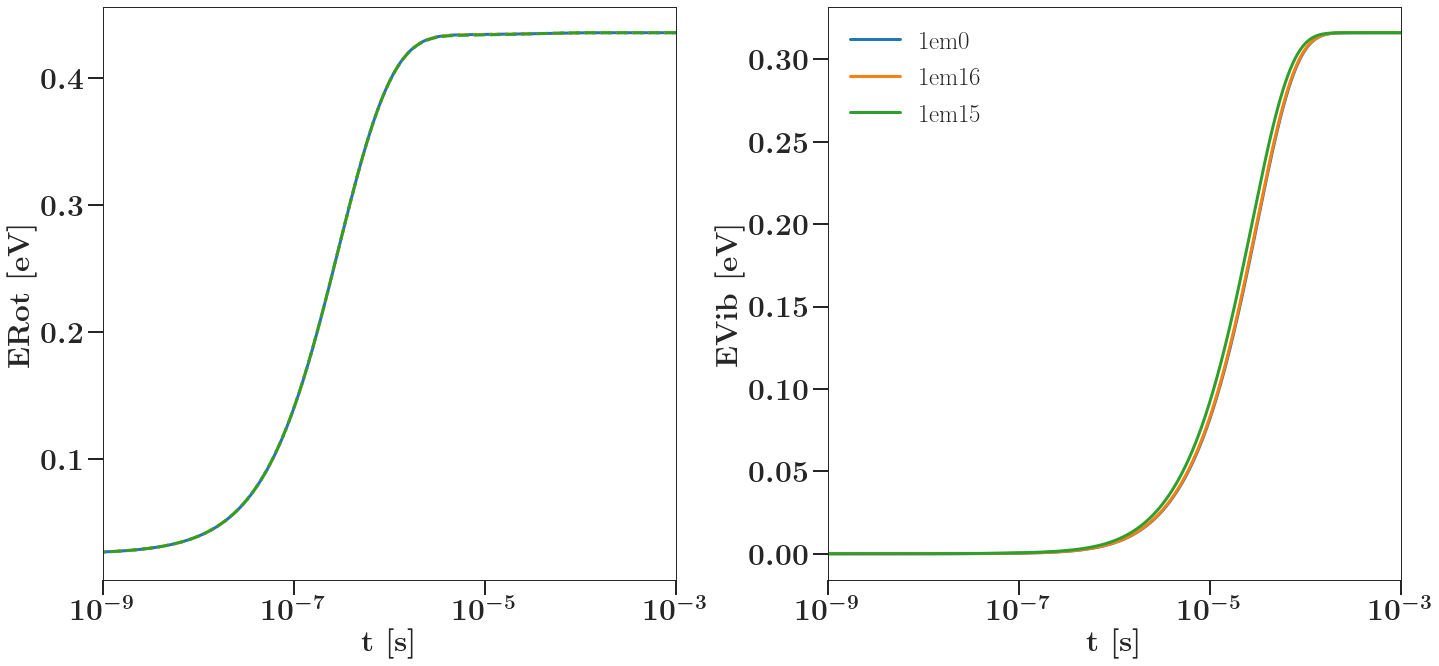

In [23]:
EnergyXLim=[1e-9,1e-3]
fig = Plot_Energies(System,QCT,EnergyXLim)
plt.savefig((Figure_ME_path+System.Name+'_'+ReactionFlgSurQCT+'_'+str(Temp)+'K_Energy_FilledMatrix.pdf'), format='pdf', dpi=600)

In [18]:
pd.set_option('display.max_columns', None)  
sns.set_style('ticks')
plt.rc('text', usetex=True)
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath} \boldmath']
# plt.rc('text.latex', preamble=r'\usepackage{pifont} \usepackage{tikz} \usepackage[utf8]{inputenc}')
plt.rc('font', family='Times')
sns.set_context("paper")

# Tick parameters
plt.rcParams['xtick.labelsize'] = 30
plt.rcParams['ytick.labelsize'] = 30
mpl.rcParams['xtick.major.size'] = 15
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.size'] = 10
mpl.rcParams['xtick.minor.width'] = 2
mpl.rcParams['ytick.major.size'] = 15
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.size'] = 10
mpl.rcParams['ytick.minor.width'] = 2

plt.rcParams['axes.labelsize'] = 30
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['legend.fontsize'] = 25

<ipython-input-18-6b0d84f6bdee>:4: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath} \boldmath']


In [19]:
# Population plot times                                                                                                                                                                                                                                      
def find_nearest(array, value):                                                                                                                                                                                                                              
    i = 0                                                                                                                                                                                                                                                    
    iStep=[]                                                                                                                                                                                                                                                 
    for ivalue in value:                                                                                                                                                                                                                                     
        array = np.asarray(array)                                                                                                                                                                                                                            
        idx = (np.abs(array - ivalue)).argmin()                                                                                                                                                                                                              
        iStep.append(idx)                                                                                                                                                                                                                                    
        i = i+1                                                                                                                                                                                                                                              
    return iStep   

def Plot_Populations(plot_times,QSSFlg,QCT):                                                                                                                                                                                         
    
    fig,ax = plt.subplots(1,1,figsize=(15,8))
    iplot = 0
    for iTemp in range(len(accuracies)):                                                                                                                                                                                                                        
        if(QSSFlg): 
            iStepVec = find_nearest(QCT[iTemp].time, [plot_times[iTemp]])                                                                                                                                                                             
        else:
            iStepVec = find_nearest(QCT[iTemp].time, plot_times)         
        
        for iStep in iStepVec:                                                                                                                                                                                                 
            print(iStep)                                                                                                                                                                                      
            cmap=mpl.colors.ListedColormap(["k","mediumvioletred","slategray","yellowgreen","sandybrown","sienna","b","c","g","cyan","navy","crimson","limegreen","gold","r","y"])                                                         

            cp = ax.scatter(DiatData[0]['EInt'], PopQCT[iTemp].Pop_g[iStep,:], label=accuracies[iTemp], alpha=0.6)                                                                                                                                
            ax.set_yscale('log') 
#             ax[iplot].set_yticks([1e12,1e14,1e16,1e18,1e20])

        iplot =+ 1
    plt.xlabel('$\epsilon$ \\textbf{[eV]}')                                                                                                                                                                                                  
    plt.ylabel('$N_i/g_i$ \\textbf{[m}$^{-3}$\\textbf{]}')  
    plt.legend(markerscale=2.0)

    return fig                                                                                                                                                                                                                     


615
615
615


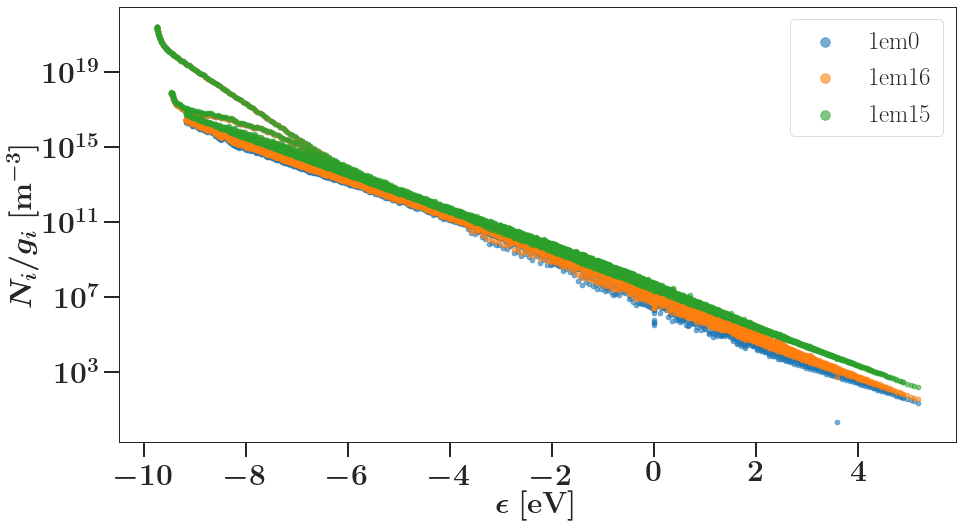

In [24]:
plot_times=[1e-7]
QSSFlg=False
fig=Plot_Populations(plot_times,QSSFlg,QCT)                                                                                                      

plt.savefig((Figure_ME_path+System.Name+'_'+ReactionFlgSurQCT+'_'+str(Temp)+'K_pop_FilledMatrix.pdf'), format='pdf', dpi=600)                                                                                                     